In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import mplscience
import os 

mplscience.available_styles()
mplscience.set_style(reset_current=True)
plt.rcParams['legend.scatterpoints'] = 1 


['default', 'despine']


In [2]:
output_dir = "."

In [3]:
df0 = pd.read_csv("joint_pca_lsi_scores.csv", index_col="Unnamed: 0")
df0.rename(columns={"0": "PCA_LSI"}, inplace=True)

In [4]:
df1 = pd.read_csv("multivi_scores.csv", index_col="Unnamed: 0")
df1.rename(columns={"0": "Multi_VI"}, inplace=True)

In [5]:
df2 = pd.read_csv("multivi_bc_scores.csv", index_col="Unnamed: 0")
df2.rename(columns={"0": "Multi_VI_bc"}, inplace=True)

In [6]:
df3 = pd.read_csv("scores_pca.csv", index_col="Unnamed: 0")
df3.rename(columns={"0": "PCA"}, inplace=True)

In [7]:
df4 = pd.read_csv("scores_scvi.csv", index_col="Unnamed: 0")
df4.rename(columns={"0": "scVI"}, inplace=True)

In [8]:
df5 = pd.read_csv("scores_scvi_bc.csv", index_col="Unnamed: 0")
df5.rename(columns={"0": "scVI_bc"}, inplace=True)

In [9]:
df6 = pd.read_csv("lsi_scores.csv", index_col="Unnamed: 0")
df6.rename(columns={"0": "LSI"}, inplace=True)

In [10]:
df7 = pd.read_csv("patac_scores.csv", index_col="Unnamed: 0")
df7.rename(columns={"0": "pATAC"}, inplace=True)

In [11]:
df8 = pd.read_csv("patac_bc_scores.csv", index_col="Unnamed: 0")
df8.rename(columns={"0": "pATAC_bc"}, inplace=True)

In [12]:
dfs = [df0, df1, df2, df3, df4, df5, df6, df7, df8]

In [13]:
df = pd.concat(dfs, axis=1)

In [14]:
df["index"] = df.index

In [15]:
df["epsilon"] = df.apply(lambda x: float(x["index"].split(",")[0][1:]), axis=1)

In [16]:
df["tau_a"] = df.apply(lambda x: float(x["index"].split(",")[1]), axis=1)

In [17]:
df["tau_b"] = df.apply(lambda x: float(x["index"].split(",")[2][:-1]), axis=1)

In [18]:
df_melted = df.melt(id_vars = ["index", "epsilon", "tau_a", "tau_b"], value_vars = ["PCA_LSI", "Multi_VI", "Multi_VI_bc", "PCA", "scVI", "scVI_bc", "LSI", "pATAC", "pATAC_bc"])

In [19]:
df_melted.head()

,index,epsilon,tau_a,tau_b,variable,value
0,"(0.0001, 1, 1)",0.0001,1.00,1.00,PCA_LSI,0.576593
1,"(0.0001, 1, 0.99)",0.0001,1.00,0.99,PCA_LSI,0.649594
2,"(0.0001, 1, 0.95)",0.0001,1.00,0.95,PCA_LSI,0.642352
3,"(0.0001, 1, 0.9)",0.0001,1.00,0.90,PCA_LSI,0.640795
4,"(0.0001, 0.99, 1)",0.0001,0.99,1.00,PCA_LSI,0.675483


In [20]:
def create_modality_col(x):
    if x["variable"] in ["PCA_LSI", "Multi_VI", "Multi_VI_bc"]:
        return "GEX+ATAC"
    if x["variable"] in ["PCA", "scVI", "scVI_bc"]:
        return "GEX"
    if x["variable"] in ["LSI", "pATAC", "pATAC_bc"]:
        return "ATAC"
    raise ValueError("not found")

df_melted["modality"] = df_melted.apply(create_modality_col, axis=1)

In [21]:
df_filtered_1 = df_melted[df_melted["epsilon"] ==0.0001]

In [22]:
labels_dict_1 = {
    "PCA_LSI": "PCA, LSI",
    "Multi_VI": "MultiVI",
    "Multi_VI_bc": "MultiVI bc",
    "PCA": "PCA",
    "scVI": "scVI",
    "scVI_bc": "scVI bc",
    "LSI": "LSI",
    "pATAC": "pATAC",
    "pATAC_bc": "pATAC bc"
}

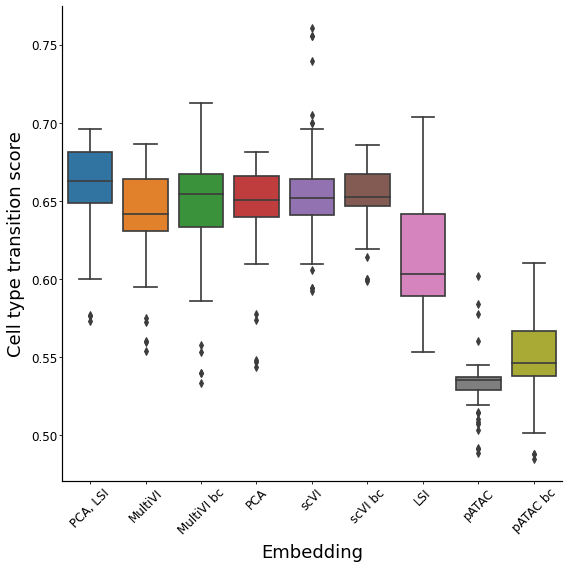

In [31]:
fig, axs = plt.subplots(1,1, figsize=(8,8))

sns.boxplot(df_melted, x = "variable", y="value")
plt.xticks(rotation=45)

_labels = [item.get_text() for item in axs.get_xticklabels()]

labels = [*map(labels_dict_1.get, _labels)]
axs.set_xticklabels(labels)

plt.legend([],[], frameon=False)
axs.set_ylabel('Cell type transition score', fontsize=18)

axs.set_xlabel('Embedding', fontsize=18)
plt.tight_layout()

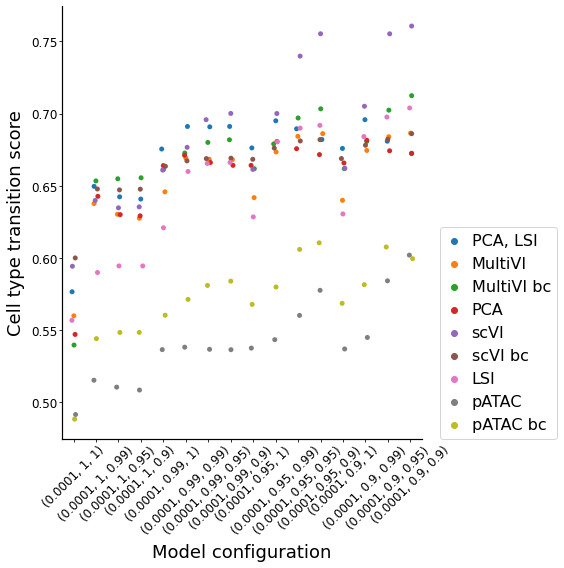

In [23]:
fig, axs = plt.subplots(1,1, figsize=(8,8))

ax = sns.stripplot(data=df_filtered_1, x="index", y="value", hue="variable", jitter=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

handles, _labels = axs.get_legend_handles_labels()
labels = [*map(labels_dict_1.get, _labels)]
axs.legend(handles, labels, frameon=True, fontsize = 16, ncol=1, loc=(1.05,0), 
            handlelength=1, handletextpad=0.6, borderaxespad=.4, columnspacing=.6)

axs.set_ylabel('Cell type transition score', fontsize=18)

axs.set_xlabel('Model configuration', fontsize=18)
plt.tight_layout()

plt.savefig(os.path.join(output_dir, "model_performance_eps_1e-4.png"), dpi=300)

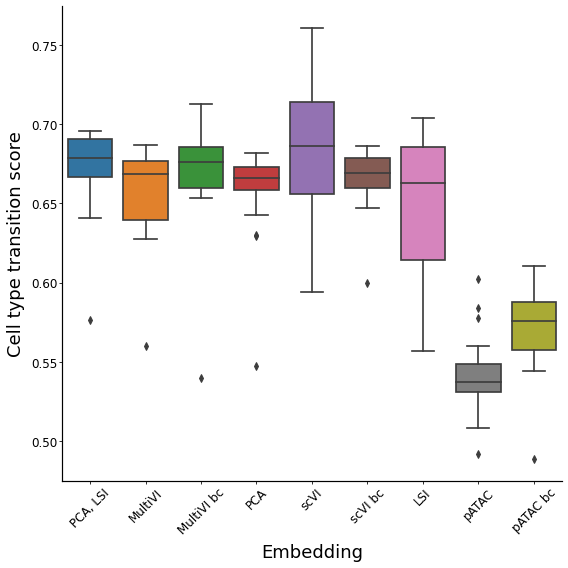

In [24]:
fig, axs = plt.subplots(1,1, figsize=(8,8))

sns.boxplot(df_filtered_1, x = "variable", y="value")
plt.xticks(rotation=45)

_labels = [item.get_text() for item in axs.get_xticklabels()]

labels = [*map(labels_dict_1.get, _labels)]
axs.set_xticklabels(labels)

plt.legend([],[], frameon=False)
axs.set_ylabel('Cell type transition score', fontsize=18)

axs.set_xlabel('Embedding', fontsize=18)
plt.tight_layout()

plt.savefig(os.path.join(output_dir, "model_performance_boxplot_eps_1e-4.png"), dpi=300)


In [25]:
df_filtered_2 = df_melted[df_melted["epsilon"] ==0.001]

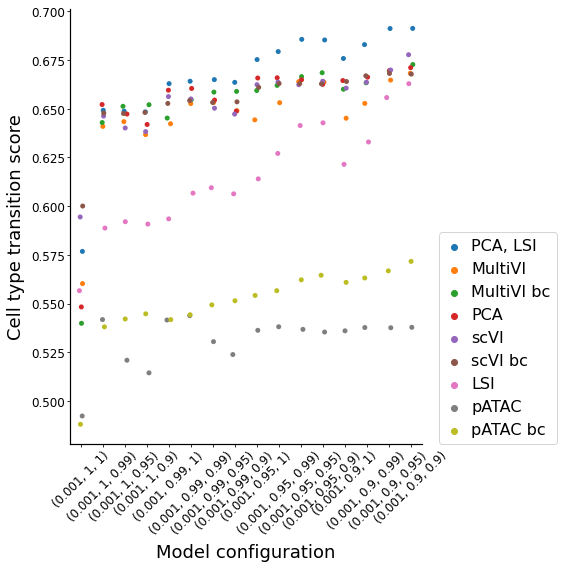

In [26]:
fig, axs = plt.subplots(1,1, figsize=(8,8))

ax = sns.stripplot(data=df_filtered_2, x="index", y="value", hue="variable", jitter=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

handles, _labels = axs.get_legend_handles_labels()
labels = [*map(labels_dict_1.get, _labels)]
axs.legend(handles, labels, frameon=True, fontsize = 16, ncol=1, loc=(1.05,0), 
            handlelength=1, handletextpad=0.6, borderaxespad=.4, columnspacing=.6)

axs.set_ylabel('Cell type transition score', fontsize=18)

axs.set_xlabel('Model configuration', fontsize=18)
plt.tight_layout()

plt.savefig(os.path.join(output_dir, "model_performance_eps_1e-3.png"), dpi=300)

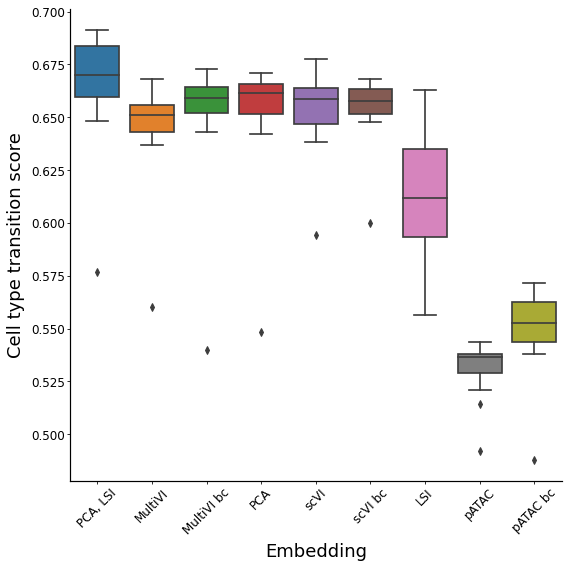

In [27]:
fig, axs = plt.subplots(1,1, figsize=(8,8))

sns.boxplot(df_filtered_2, x = "variable", y="value")
plt.xticks(rotation=45)

_labels = [item.get_text() for item in axs.get_xticklabels()]

labels = [*map(labels_dict_1.get, _labels)]
axs.set_xticklabels(labels)

plt.legend([],[], frameon=False)
axs.set_ylabel('Cell type transition score', fontsize=18)

axs.set_xlabel('Embedding', fontsize=18)
plt.tight_layout()

plt.savefig(os.path.join(output_dir, "model_performance_boxplot_eps_1e-3.png"), dpi=300)

In [28]:
df_filtered_3 = df_melted[df_melted["epsilon"] ==0.01]

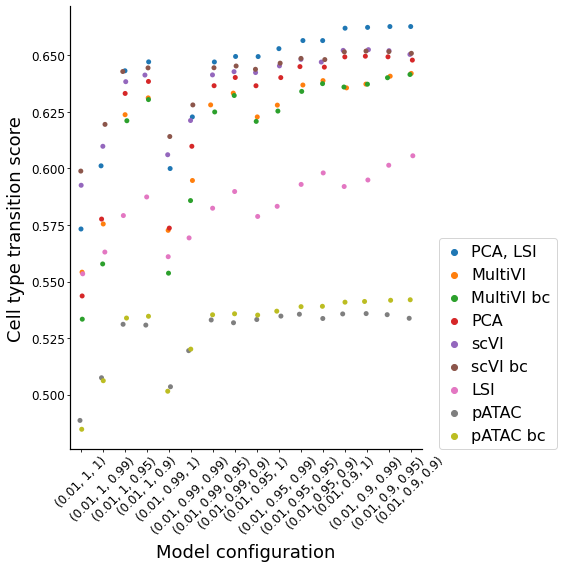

In [29]:
fig, axs = plt.subplots(1,1, figsize=(8,8))

ax = sns.stripplot(data=df_filtered_3, x="index", y="value", hue="variable", jitter=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

handles, _labels = axs.get_legend_handles_labels()
labels = [*map(labels_dict_1.get, _labels)]
axs.legend(handles, labels, frameon=True, fontsize = 16, ncol=1, loc=(1.05,0), 
            handlelength=1, handletextpad=0.6, borderaxespad=.4, columnspacing=.6)

axs.set_ylabel('Cell type transition score', fontsize=18)

axs.set_xlabel('Model configuration', fontsize=18)
plt.tight_layout()

plt.savefig(os.path.join(output_dir, "model_performance_eps_1e-2.png"), dpi=300)

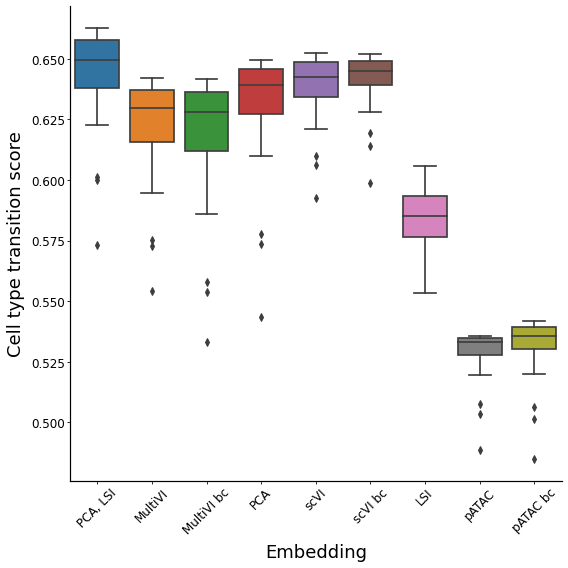

In [30]:
fig, axs = plt.subplots(1,1, figsize=(8,8))

sns.boxplot(df_filtered_3, x = "variable", y="value")
plt.xticks(rotation=45)

_labels = [item.get_text() for item in axs.get_xticklabels()]

labels = [*map(labels_dict_1.get, _labels)]
axs.set_xticklabels(labels)

plt.legend([],[], frameon=False)
axs.set_ylabel('Cell type transition score', fontsize=18)

axs.set_xlabel('Embedding', fontsize=18)
plt.tight_layout()

plt.savefig(os.path.join(output_dir, "model_performance_boxplot_eps_1e-2.png"), dpi=300)